## First support code: generate the grado-cc graph

In [80]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from matplotlib.widgets import Slider
import ipywidgets as widgets
from scipy.optimize import differential_evolution
from IPython.display import display
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as sch

In [81]:
file1_path = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\weighted_degree.txt"
file2_path = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\clusteringsss.txt"

# Carica i file di testo in pandas DataFrame
df1 = pd.read_csv(file1_path, header=None, delimiter='\t')  # Modifica il delimitatore se necessario
df2 = pd.read_csv(file2_path, header=None, delimiter='\t')  # Modifica il delimitatore se necessario

# Assicurati che entrambi i DataFrame abbiano la stessa lunghezza
# (se vuoi solo la prima colonna o una selezione di colonne, puoi fare df1[0], df2[0], ecc.)
col1 = df1.iloc[:, 0]  # Estrai la prima colonna del primo file
col2 = df2.iloc[:, 0]  # Estrai la prima colonna del secondo file

# Crea un DataFrame con le due colonne
combined_df = pd.DataFrame({'Grado': col1, 'Clustering': col2})

# Scrivi il DataFrame combinato in un file Excel
combined_df.to_excel(r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\Grado_cluster.xlsx", index=False)

C:\Users\Davvy\AppData\Local\Temp\ipykernel_24396\522448165.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


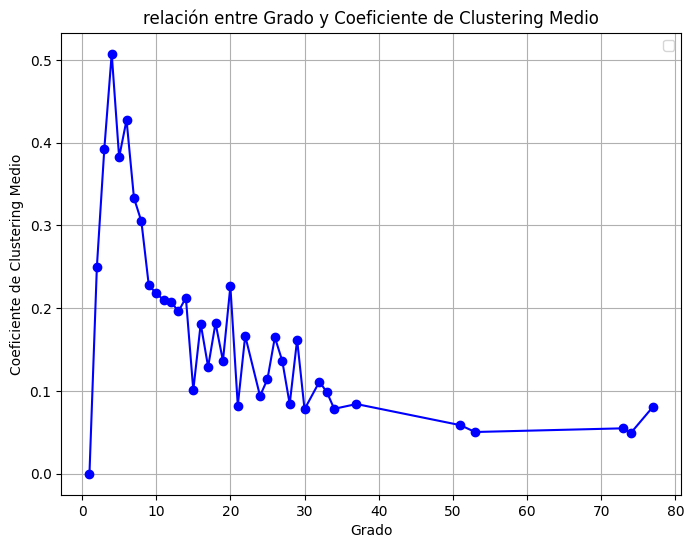

In [82]:
file_path = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\Grado_cluster.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')

data.columns = ['Grado', 'Clustering']
mean_clustering = data.groupby('Grado')['Clustering'].mean()

x = mean_clustering.index
y = mean_clustering.values

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o-', color='b')
plt.title("relación entre Grado y Coeficiente de Clustering Medio")
plt.xlabel("Grado")
plt.ylabel("Coeficiente de Clustering Medio")
plt.grid(True)
plt.legend()
plt.show()

## Second support code: gamma coefficient

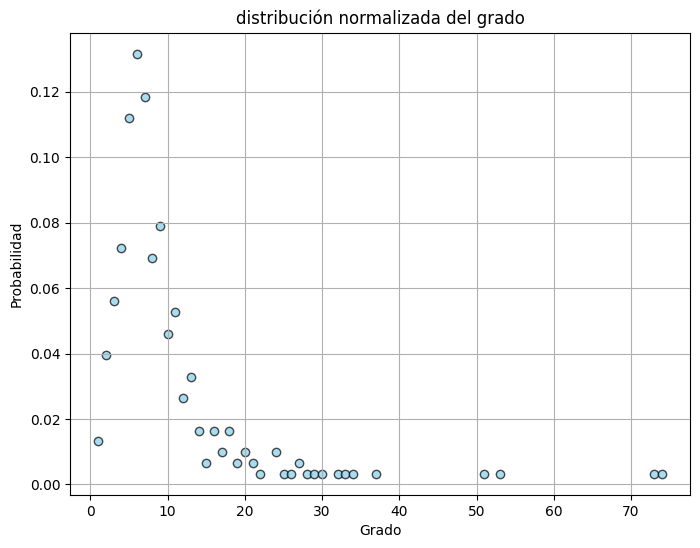

In [83]:
file_path = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\Grado_cluster.xlsx"
df = pd.read_excel(file_path)

gradi = df.iloc[:, 0]

# Conta la frequenza di ciascun grado
frequenze = gradi.value_counts().sort_index()

# Filtriamo i gradi per includere solo quelli >= 5 e <= 75 (intervallo di interesse)
frequenze_filtrate = frequenze[(frequenze.index >= 0) & (frequenze.index <= 75)]

# Estrai i dati per la normalizzazione
x_data = frequenze_filtrate.index
y_data = frequenze_filtrate.values

# Calcoliamo la somma totale delle frequenze
sum_frequenze = np.sum(y_data)

# Normalizziamo le frequenze in probabilità
y_data_normalized = y_data / sum_frequenze

# Crea un grafico a dispersione (puntini) per la distribuzione normalizzata dei gradi
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data_normalized, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('distribución normalizada del grado')
plt.xlabel('Grado')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()


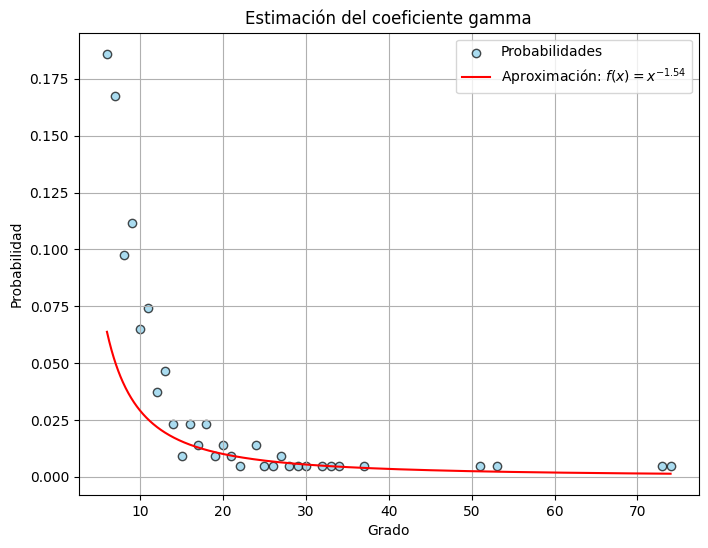

In [88]:
gradi = df.iloc[:, 0]

# Conta la frequenza di ciascun grado
frequenze = gradi.value_counts().sort_index()

# Filtriamo i gradi per includere solo quelli >= 5 e <= 75 (intervallo di interesse)
frequenze_filtrate = frequenze[(frequenze.index >= 6) & (frequenze.index <= 75)]

# Estrai i dati per la normalizzazione
x_data = frequenze_filtrate.index
y_data = frequenze_filtrate.values

# Calcoliamo la somma totale delle frequenze
sum_frequenze = np.sum(y_data)

# Normalizziamo le frequenze in probabilità
y_data_normalized = y_data / sum_frequenze

# Funzione di legge di potenza che vogliamo adattare: f(x) = x^(-gamma)
def power_law(x, gamma):
    return x ** (-gamma)

# Funzione per calcolare l'errore relativo tra la funzione di potenza e i dati reali
def error_function(gamma, x, y):
    y_fit = power_law(x, gamma)
    return np.sum(np.abs((y - y_fit) / y))  # Errore relativo

# Troviamo il miglior gamma minimizzando l'errore relativo
result = minimize(lambda gamma: error_function(gamma, x_data, y_data_normalized), x0=[-5.0], bounds=[(None, None)])

# Estraiamo il miglior valore di gamma
gamma_best = result.x[0]

# Crea nuovi valori per x per l'interpolazione
x_values_interp = np.linspace(min(x_data), max(x_data), 1000)

# Calcola la curva di approssimazione con il gamma ottimale
y_best_fit = power_law(x_values_interp, gamma_best)

# Crea il grafico
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data_normalized, color='skyblue', edgecolor='black', alpha=0.7, label="Probabilidades")
plt.plot(x_values_interp, y_best_fit, color='red', label=f"Aproximación: $f(x) = x^{{-{gamma_best:.2f}}}$")
plt.title('Estimación del coeficiente gamma')
plt.xlabel('Grado')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

In [85]:
import ipywidgets as widgets
from IPython.display import display

# Funzione per aggiornare il grafico in base al valore dello slider
def update_plot(gamma):
    y_best_fit = power_law(x_values_interp, gamma)
    
    # Pulisce il grafico
    plt.clf()
    
    # Crea il grafico
    plt.scatter(x_data, y_data_normalized, color='skyblue', edgecolor='black', alpha=0.7, label="Probabilità (Dati reali)")
    plt.plot(x_values_interp, y_best_fit, color='red', label=f"Approssimazione: $f(x) = x^{{-{gamma:.2f}}}$")
    plt.title('Distribuzione del Grado con Legge di Potenza (Probabilità)')
    plt.xlabel('Grado (Numero di collegamenti)')
    plt.ylabel('Probabilità')
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico aggiornato
    plt.show()

# Crea lo slider interattivo
slider = widgets.FloatSlider(
    value=gamma_best,
    min=0.5,
    max=3.0,
    step=0.01,
    description='Gamma:',
    continuous_update=False
)

# Collega lo slider alla funzione di aggiornamento del grafico e mostra il grafico
interactive_plot = widgets.interactive(update_plot, gamma=slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.6808867673339039, continuous_update=False, description='Gamma:', max…

In [86]:
result_de = differential_evolution(lambda gamma: error_function(gamma, x_data, y_data_normalized), bounds=[(0.1, 3.0)])

# Estraiamo il miglior valore di gamma
gamma_best_de = result_de.x[0]

print(f"Gamma ottimale (Differential Evolution): {gamma_best_de}")

result_powell = minimize(lambda gamma: error_function(gamma, x_data, y_data_normalized), x0=[1.0], method='Powell')

# Estraiamo il miglior valore di gamma
gamma_best_powell = result_powell.x[0]

print(f"Gamma ottimale (Powell's Method): {gamma_best_powell}")

Gamma ottimale (Differential Evolution): 1.6808867709197093
Gamma ottimale (Powell's Method): 1.6808867717559857


## Third support code: distancia media ponderata

In [87]:
# Carica i file Excel
nodi_file = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\Musk_nodes.xlsx"
archi_file = r"C:\Users\Davvy\OneDrive\Desktop\polimi\erasmus\AAA_CURSOS\RSC\practica\P4\Copy of Musk_edges.xlsx"

# Leggi i dati dei nodi e degli archi
nodi = pd.read_excel(nodi_file)
archi = pd.read_excel(archi_file)

# Crea il grafo pesato
G = nx.Graph()  # Usa nx.DiGraph() se il grafo è diretto

# Aggiungi i nodi
for _, row in nodi.iterrows():
    G.add_node(row['Id'], label=row['Label'])

# Aggiungi gli archi con pesi
for _, row in archi.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Calcola la componente connessa più grande
largest_cc = max(nx.connected_components(G), key=len)  # Usa nx.strongly_connected_components() per grafi diretti
G_largest_cc = G.subgraph(largest_cc)

# Calcola la distanza media (path length) e il diametro
if nx.is_connected(G_largest_cc):
    avg_distance = nx.average_shortest_path_length(G_largest_cc, weight='weight')
    diameter = nx.diameter(G_largest_cc, e=None, usebounds=False)
else:
    avg_distance = float('inf')  # Imposta infinito se il grafo non è connesso
    diameter = None

# Stampa i risultati
print(f"Distanza media (pesata): {avg_distance}")
print(f"Diametro (pesato): {diameter}")

KeyError: "There is no item named 'xl/sharedStrings.xml' in the archive"